In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cluster-text/cluster_texts.json
/kaggle/input/last-advertisement/datasetX3_reverse.pt
/kaggle/input/last-advertisement/latent_featuresX4.npy


In [2]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [3]:
import umap.umap_ as umap

2025-04-30 12:13:09.750236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746015189.997995      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746015190.069514      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
latent_vector = np.load('/kaggle/input/last-advertisement/latent_featuresX4.npy')
latent_vector.shape

(1115, 128)

In [5]:
df_latent = pd.DataFrame(latent_vector, columns=[f'feature_{i}' for i in range(128)])

In [6]:
df_latent

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      1.762023   2.355155  -0.345444  -0.285635   2.348298   0.149682   
1      1.998154   1.143388  -0.574468  -0.115171   1.654163   0.851080   
2      0.630011   1.280316  -1.531404   1.003172   0.966568   1.625821   
3     -1.551908  -1.934059   0.376256  -0.994241  -2.404043  -0.031774   
4      0.474801  -4.777137  -1.721403  -1.806178  -1.362315   0.097339   
...         ...        ...        ...        ...        ...        ...   
1110  -0.168442   1.835194   1.075905  -0.389289  -0.900182   1.070301   
1111  -1.681953  -0.644786  -0.912656  -1.262098  -1.640609  -0.689349   
1112   0.503031   0.582895  -0.882170   3.489625   1.057039  -3.084008   
1113   1.337642  -0.014859  -2.469726   2.509066  -0.052973  -1.768521   
1114   0.273866  -0.734761  -0.387160   0.465826  -1.062301   1.259063   

      feature_6  feature_7  feature_8  feature_9  ...  feature_118  \
0     -0.563872  -1.035792   2.530730  -1.128144  ...     0.280946   
1     -2.305207  -0.294089   0.944058  -1.632830  ...     1.878856   
2      0.520339   1.176362   0.425154  -0.572972  ...     0.222454   
3      0.096257   1.536682  -1.963637   1.621420  ...    -0.801956   
4     -2.408338   0.699672  -0.463260   2.474046  ...     0.700642   
...         ...        ...        ...        ...  ...          ...   
1110  -0.077506  -1.119881   2.830307  -1.830385  ...     0.809491   
1111   1.011143   0.700364  -1.268015   1.209506  ...    -0.303189   
1112   0.824140  -0.380972  -1.073023  -0.240631  ...     0.884534   
1113  -0.584001  -1.778759  -1.985263   0.074184  ...     1.774379   
1114   0.534815   1.644197  -0.488076  -0.134562  ...    -0.448505   

      feature_119  feature_120  feature_121  feature_122  feature_123  \
0       -1.176229     0.399565     0.107600     1.045079    -0.754902   
1       -0.889405     0.147581    -0.843858    -1.287375    -0.232982   
2        0.962564    -0.572213    -0.566406    -0.786100    -0.301815   
3       -0.367559     1.105180     0.149391     0.160493     1.171434   
4        3.220425     0.487300     2.928204    -1.191891     1.954701   
...           ...          ...          ...          ...          ...   
1110    -1.697548     1.662601    -0.722860     1.890658     0.865818   
1111    -1.588104    -1.477805    -1.488120    -0.880614    -0.645833   
1112     1.683918     2.381195    -1.199001     0.209011    -0.501862   
1113     2.295412     2.290611     0.427356     0.373084     1.915419   
1114     0.389792     1.073975    -1.324213    -0.438065    -0.276457   

      feature_124  feature_125  feature_126  feature_127  
0        1.002650     1.084134    -0.102819    -0.597396  
1       -0.733092    -2.023010     1.500133    -0.218446  
2        0.769449     0.240286     0.501806    -1.355529  
3       -1.122877    -0.605057    -0.873919     0.421145  
4       -2.431213    -0.245581    -1.974602     0.391298  
...           ...          ...          ...          ...  
1110     4.125103    -1.894413     2.983667     3.795069  
1111     0.026244    -0.237902     0.907006    -0.483950  
1112     0.546058     3.076307     1.187679     2.120387  
1113     0.621704     0.971769     0.132937     3.454433  
1114    -0.795848     0.141240     1.307510    -1.448860  

[1115 rows x 128 columns]

# Processing

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = StandardScaler()
mms = MinMaxScaler()
latent_scaled = std.fit_transform(latent_vector)
# latent_scaled = mms.fit_transform(latent_vector)

In [8]:
import random

np.random.seed(42)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality Reduction

In [10]:
from sklearn.manifold import trustworthiness

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=2, trustworthiness=0.8410


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=3, trustworthiness=0.8878


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=4, trustworthiness=0.9152


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=5, trustworthiness=0.9245


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=6, trustworthiness=0.9305


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=7, trustworthiness=0.9319


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=8, trustworthiness=0.9314


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=9, trustworthiness=0.9301


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=10, trustworthiness=0.9340


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=11, trustworthiness=0.9309


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=12, trustworthiness=0.9313


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=13, trustworthiness=0.9293


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=14, trustworthiness=0.9314


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=15, trustworthiness=0.9321


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=16, trustworthiness=0.9307


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=17, trustworthiness=0.9326


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=18, trustworthiness=0.9308


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=19, trustworthiness=0.9316


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_components=20, trustworthiness=0.9323


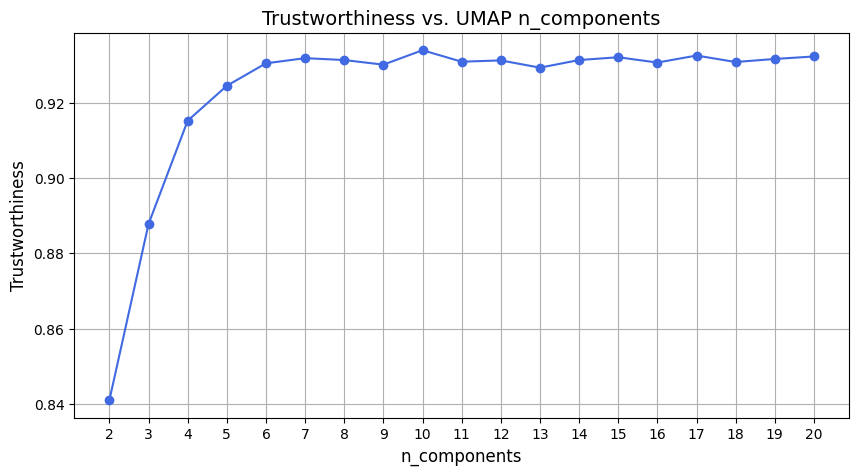

In [10]:
trust_scores = []
component_range = range(2, 21)  

for n in component_range:
    reducer = umap.UMAP(n_neighbors=50, min_dist=0.001, n_components=n, metric='cosine', random_state=42)
    latent_reduced = reducer.fit_transform(latent_scaled)
    score = trustworthiness(latent_scaled, latent_reduced)
    trust_scores.append(score)
    print(f"n_components={n}, trustworthiness={score:.4f}")

# Plot กราฟ
plt.figure(figsize=(10, 5))
plt.plot(component_range, trust_scores, marker='o', color='royalblue')
plt.title("Trustworthiness vs. UMAP n_components", fontsize=14)
plt.xlabel("n_components", fontsize=12)
plt.ylabel("Trustworthiness", fontsize=12)
plt.grid(True)
plt.xticks(component_range)
plt.savefig("umap_dimension.png", dpi=400, bbox_inches='tight')  
plt.show()

In [11]:
from sklearn.decomposition import PCA

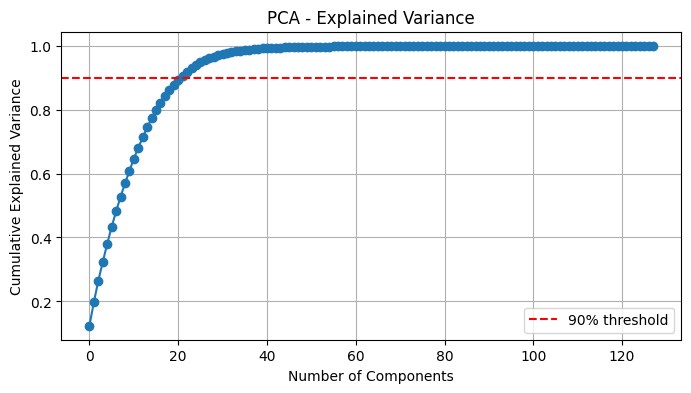

In [12]:
pca = PCA()
pca.fit(latent_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.savefig("pca_covariance.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
pca = PCA(n_components=20)
latent_pca = pca.fit_transform(latent_scaled)

umap_3d = umap.UMAP(n_neighbors=50, min_dist=0.001, n_components=10, metric='cosine', random_state=42)
latent_umap_3d = umap_3d.fit_transform(latent_scaled)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


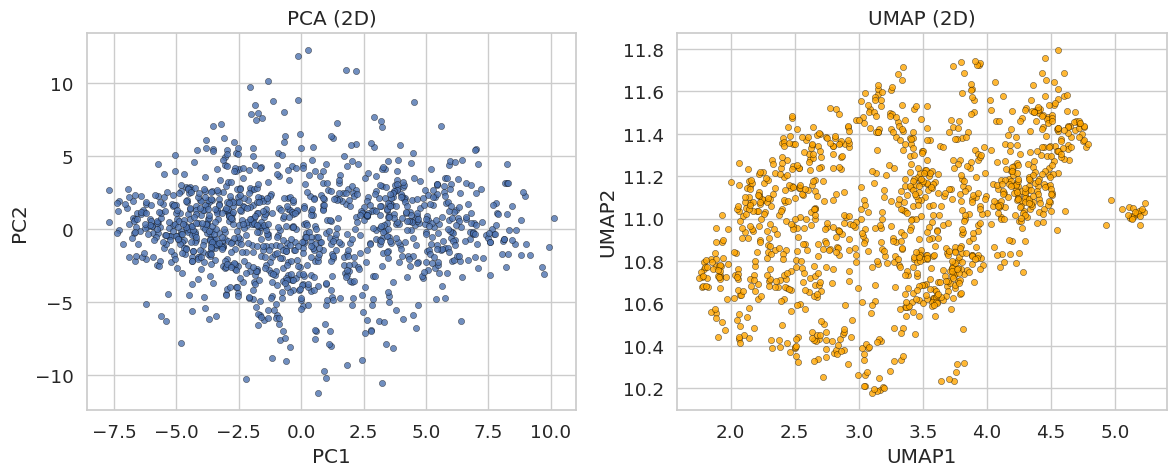

In [14]:
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=latent_pca[:, 0],
    y=latent_pca[:, 1],
    s=20,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.3
)
plt.title('PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=latent_umap_3d[:, 0],
    y=latent_umap_3d[:, 1],
    s=20,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.3,
    color='orange'
)
plt.title('UMAP (2D)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.tight_layout()
plt.savefig("Dimension Reduction PCA and umap.png", dpi=400, bbox_inches='tight')
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D

/tmp/ipykernel_31/2227529284.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


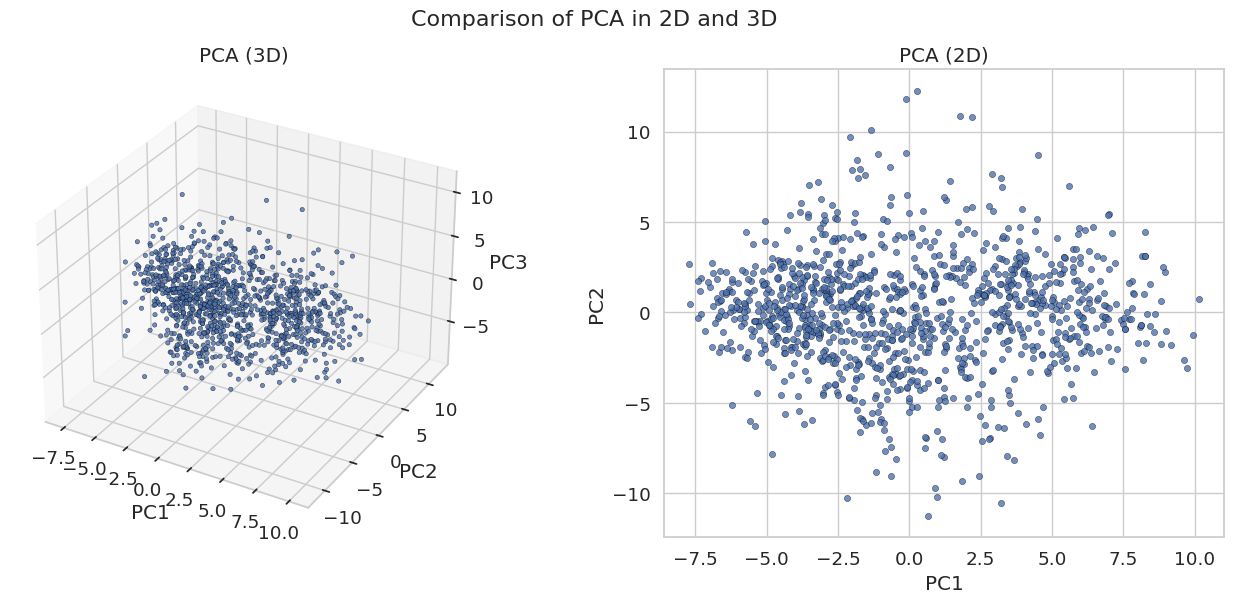

In [15]:
sns.set(style='whitegrid', font_scale=1.2)

fig = plt.figure(figsize=(14, 6))  
gs = fig.add_gridspec(1, 2, wspace=0.25)

# --- PCA 3D (Left) ---
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax1.scatter(
    latent_pca[:, 0],
    latent_pca[:, 1],
    latent_pca[:, 2],
    s=10,
    alpha=0.8,
    edgecolors='black',
    linewidth=0.3
)
ax1.set_title('PCA (3D)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# --- PCA 2D (Right) ---
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(
    latent_pca[:, 0],
    latent_pca[:, 1],
    s=20,
    alpha=0.8,
    edgecolors='black',
    linewidth=0.3
)
ax2.set_title('PCA (2D)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

plt.subplots_adjust(left=0.05, right=0.95, top=0.88, bottom=0.1)
plt.suptitle("Comparison of PCA in 2D and 3D", fontsize=16)
plt.tight_layout()
plt.savefig("pca 3D.png", dpi=400, bbox_inches='tight')
plt.show()

/tmp/ipykernel_31/2444693081.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


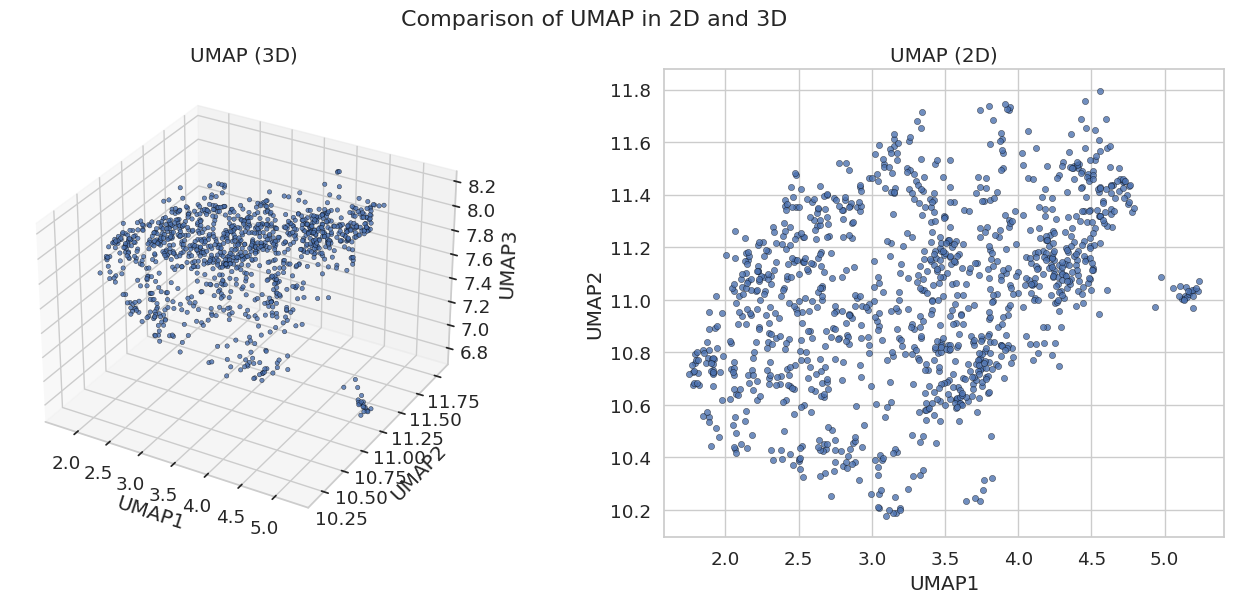

In [17]:
sns.set(style='whitegrid', font_scale=1.2)

fig = plt.figure(figsize=(14, 6))  
gs = fig.add_gridspec(1, 2, wspace=0.25)

# --- UMAP 3D (Left) ---
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax1.scatter(
    latent_umap_3d[:, 0],
    latent_umap_3d[:, 1],
    latent_umap_3d[:, 2],
    s=10,
    alpha=0.8,
    edgecolors='black',
    linewidth=0.3
)
ax1.set_title('UMAP (3D)')
ax1.set_xlabel('UMAP1')
ax1.set_ylabel('UMAP2')
ax1.set_zlabel('UMAP3')

# --- UMAP 2D (Right) ---
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(
    latent_umap_3d[:, 0],
    latent_umap_3d[:, 1],
    s=20,
    alpha=0.8,
    edgecolors='black',
    linewidth=0.3
)
ax2.set_title('UMAP (2D)')
ax2.set_xlabel('UMAP1')
ax2.set_ylabel('UMAP2')

plt.subplots_adjust(left=0.05, right=0.95, top=0.88, bottom=0.1)
plt.suptitle("Comparison of UMAP in 2D and 3D", fontsize=16)
plt.tight_layout()
plt.savefig("umap_3Ddimension.png", dpi=400, bbox_inches='tight')
plt.show()

In [18]:
trustworthiness_score = trustworthiness(latent_vector, latent_umap_3d)
trustworthiness_score

0.9355867471978158

# Modeling

In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [23]:
wcss = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(latent_reduced)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
n_components = range(1, 10)  
bic_scores = []
aic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42, covariance_type='diag', init_params='kmeans')
    gmm.fit(latent_umap_3d)  
    bic_scores.append(gmm.bic(latent_umap_3d))
    aic_scores.append(gmm.aic(latent_umap_3d))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

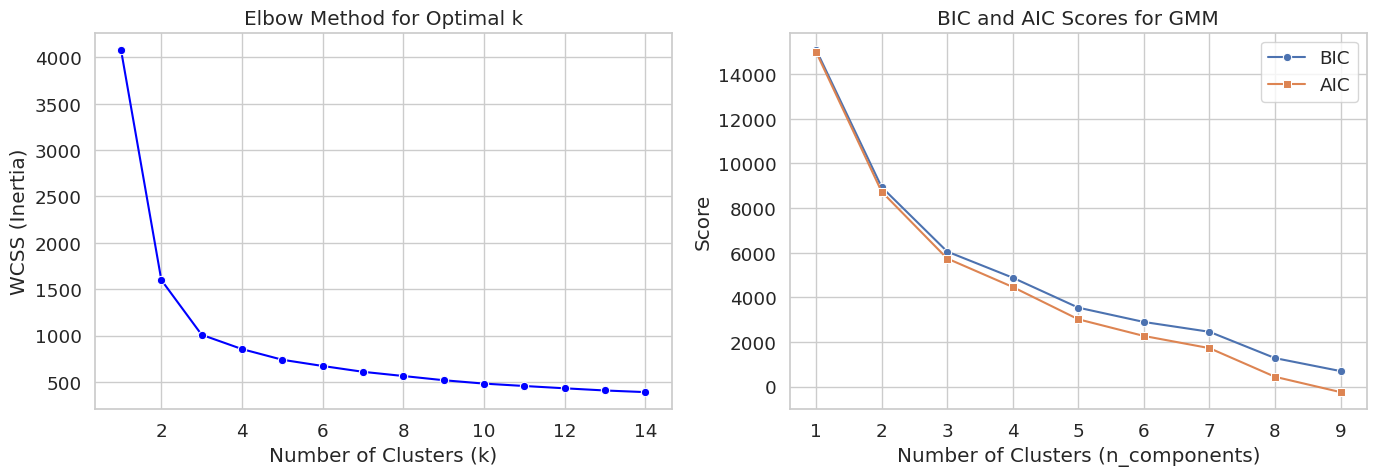

In [25]:
sns.set(style='whitegrid', font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Elbow Plot (KMeans WCSS) ---
sns.lineplot(x=K, y=wcss, marker='o', color='blue', ax=axes[0])
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS (Inertia)')
axes[0].grid(True)

# --- BIC / AIC Plot (GMM) ---
sns.lineplot(x=n_components, y=bic_scores, marker='o', label='BIC', ax=axes[1])
sns.lineplot(x=n_components, y=aic_scores, marker='s', label='AIC', ax=axes[1])
axes[1].set_title('BIC and AIC Scores for GMM')
axes[1].set_xlabel('Number of Clusters (n_components)')
axes[1].set_ylabel('Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig("WCSS vs Bayesian.png", dpi=400, bbox_inches='tight')
plt.show()

GMM

In [14]:
gmm = GaussianMixture(n_components=2, random_state=42, covariance_type='diag', init_params='kmeans')
gmm_lab = gmm.fit_predict(latent_umap_3d)
gmm_lab

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
df_latent['cluster_id'] = gmm_lab

In [16]:
df_latent

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      1.762023   2.355155  -0.345444  -0.285635   2.348298   0.149682   
1      1.998154   1.143388  -0.574468  -0.115171   1.654163   0.851080   
2      0.630011   1.280316  -1.531404   1.003172   0.966568   1.625821   
3     -1.551908  -1.934059   0.376256  -0.994241  -2.404043  -0.031774   
4      0.474801  -4.777137  -1.721403  -1.806178  -1.362315   0.097339   
...         ...        ...        ...        ...        ...        ...   
1110  -0.168442   1.835194   1.075905  -0.389289  -0.900182   1.070301   
1111  -1.681953  -0.644786  -0.912656  -1.262098  -1.640609  -0.689349   
1112   0.503031   0.582895  -0.882170   3.489625   1.057039  -3.084008   
1113   1.337642  -0.014859  -2.469726   2.509066  -0.052973  -1.768521   
1114   0.273866  -0.734761  -0.387160   0.465826  -1.062301   1.259063   

      feature_6  feature_7  feature_8  feature_9  ...  feature_119  \
0     -0.563872  -1.035792   2.530730  -1.128144  ...    -1.176229   
1     -2.305207  -0.294089   0.944058  -1.632830  ...    -0.889405   
2      0.520339   1.176362   0.425154  -0.572972  ...     0.962564   
3      0.096257   1.536682  -1.963637   1.621420  ...    -0.367559   
4     -2.408338   0.699672  -0.463260   2.474046  ...     3.220425   
...         ...        ...        ...        ...  ...          ...   
1110  -0.077506  -1.119881   2.830307  -1.830385  ...    -1.697548   
1111   1.011143   0.700364  -1.268015   1.209506  ...    -1.588104   
1112   0.824140  -0.380972  -1.073023  -0.240631  ...     1.683918   
1113  -0.584001  -1.778759  -1.985263   0.074184  ...     2.295412   
1114   0.534815   1.644197  -0.488076  -0.134562  ...     0.389792   

      feature_120  feature_121  feature_122  feature_123  feature_124  \
0        0.399565     0.107600     1.045079    -0.754902     1.002650   
1        0.147581    -0.843858    -1.287375    -0.232982    -0.733092   
2       -0.572213    -0.566406    -0.786100    -0.301815     0.769449   
3        1.105180     0.149391     0.160493     1.171434    -1.122877   
4        0.487300     2.928204    -1.191891     1.954701    -2.431213   
...           ...          ...          ...          ...          ...   
1110     1.662601    -0.722860     1.890658     0.865818     4.125103   
1111    -1.477805    -1.488120    -0.880614    -0.645833     0.026244   
1112     2.381195    -1.199001     0.209011    -0.501862     0.546058   
1113     2.290611     0.427356     0.373084     1.915419     0.621704   
1114     1.073975    -1.324213    -0.438065    -0.276457    -0.795848   

      feature_125  feature_126  feature_127  cluster_id  
0        1.084134    -0.102819    -0.597396           1  
1       -2.023010     1.500133    -0.218446           1  
2        0.240286     0.501806    -1.355529           1  
3       -0.605057    -0.873919     0.421145           0  
4       -0.245581    -1.974602     0.391298           0  
...           ...          ...          ...         ...  
1110    -1.894413     2.983667     3.795069           0  
1111    -0.237902     0.907006    -0.483950           0  
1112     3.076307     1.187679     2.120387           1  
1113     0.971769     0.132937     3.454433           1  
1114     0.141240     1.307510    -1.448860           1  

[1115 rows x 129 columns]

In [17]:
df_latent.to_csv('df_latent_lab.csv', index=False)

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(latent_umap_3d, gmm_lab)

0.5104482

K-Means

In [28]:
km = KMeans(n_clusters=2, random_state=42)
km_lab = km.fit_predict(latent_umap_3d)

silhouette_score(latent_umap_3d, km_lab)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5078617

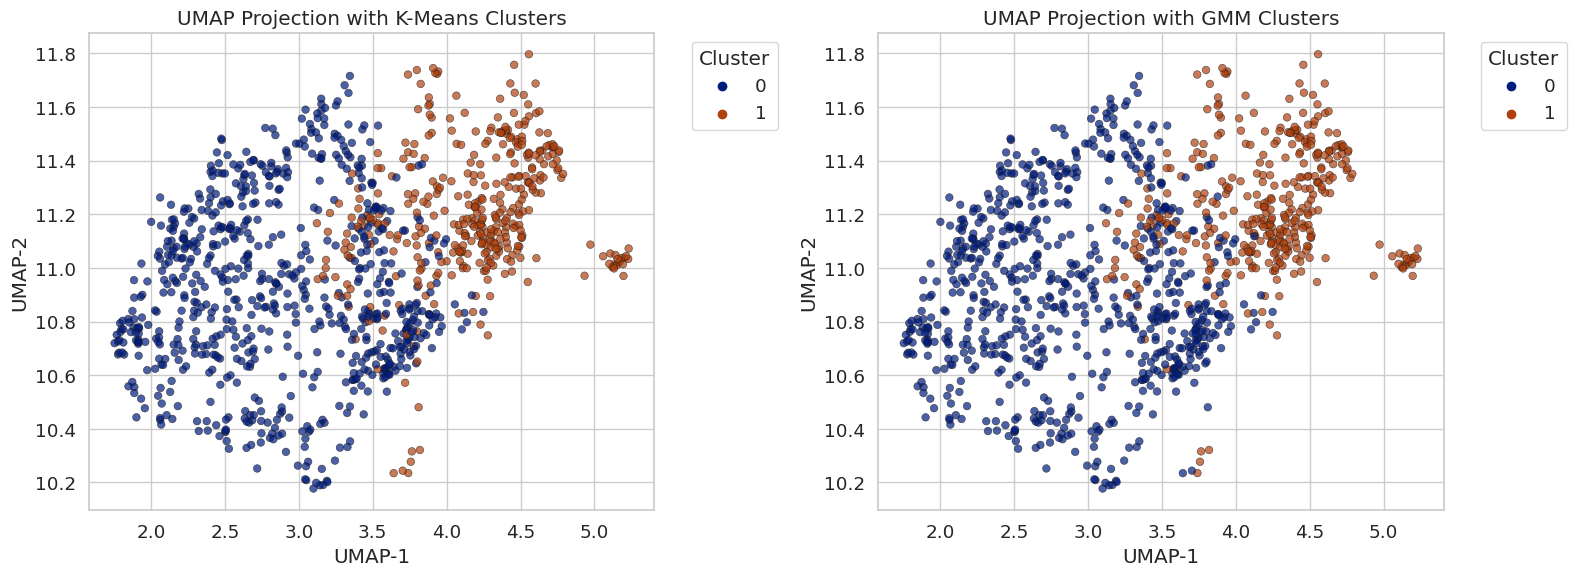

In [29]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  
palette = sns.color_palette("dark", len(np.unique(gmm_lab)))
sns.scatterplot(
    x=latent_umap_3d[:, 0],
    y=latent_umap_3d[:, 1],
    hue=km_lab,
    palette=palette,
    s=30,
    alpha=0.7,
    edgecolor='k'
)
plt.title("UMAP Projection with K-Means Clusters")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)  
sns.scatterplot(
    x=latent_umap_3d[:, 0],
    y=latent_umap_3d[:, 1],
    hue=gmm_lab,
    palette=palette,
    s=30,
    alpha=0.7,
    edgecolor='k'
)
plt.title("UMAP Projection with GMM Clusters")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Clustering 2D.png", dpi=400, bbox_inches='tight')
plt.show()

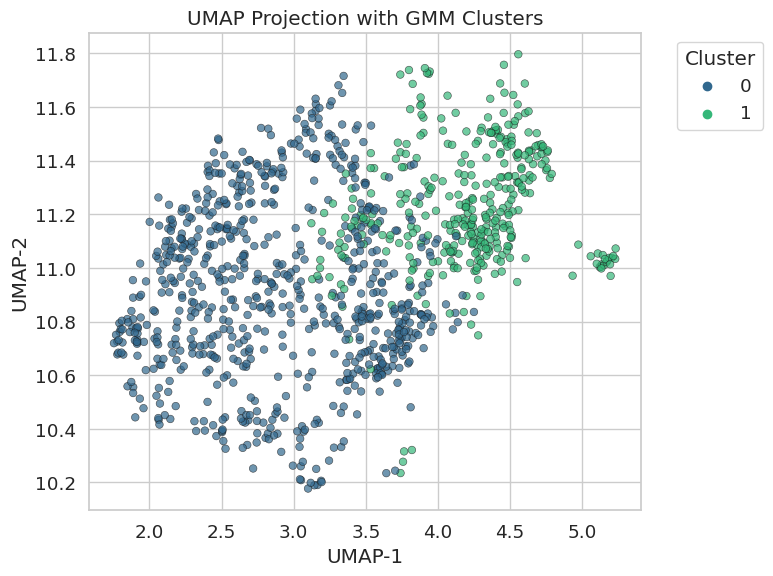

In [31]:
plt.figure(figsize=(8, 6))  

palette = sns.color_palette("viridis", len(np.unique(gmm_lab)))
sns.scatterplot(
    x=latent_umap_3d[:, 0],
    y=latent_umap_3d[:, 1],
    hue=gmm_lab,
    palette=palette,
    s=30,
    alpha=0.7,
    edgecolor='k'
)
plt.title("UMAP Projection with GMM Clusters")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("GMM Clustering.png", dpi=400, bbox_inches='tight')
plt.show()

In [32]:
np.bincount(gmm_lab)

array([745, 370])

# Merged Photo with Cluster

In [33]:
def reverse_normalize(tensor_img):
    """
    ย้อน normalize จาก [-1, 1] → [0, 1]
    รองรับ Tensor shape (C, H, W) หรือ (N, C, H, W)
    """
    return (tensor_img * 0.5) + 0.5

In [34]:
import torch

In [35]:
dataset = torch.load("/kaggle/input/last-advertisement/datasetX3_reverse.pt") 

/tmp/ipykernel_31/1068248531.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/kaggle/input/last-advertisement/datasetX3_reverse.pt")


In [36]:
dataset = reverse_normalize(dataset)

In [37]:
images_np = dataset.numpy().transpose(0, 2, 3, 1) 

In [38]:
cluster_images = {}

for cluster in range(2):
    idxs = np.where(gmm_lab == cluster)[0]
    cluster_images[cluster] = images_np[idxs]

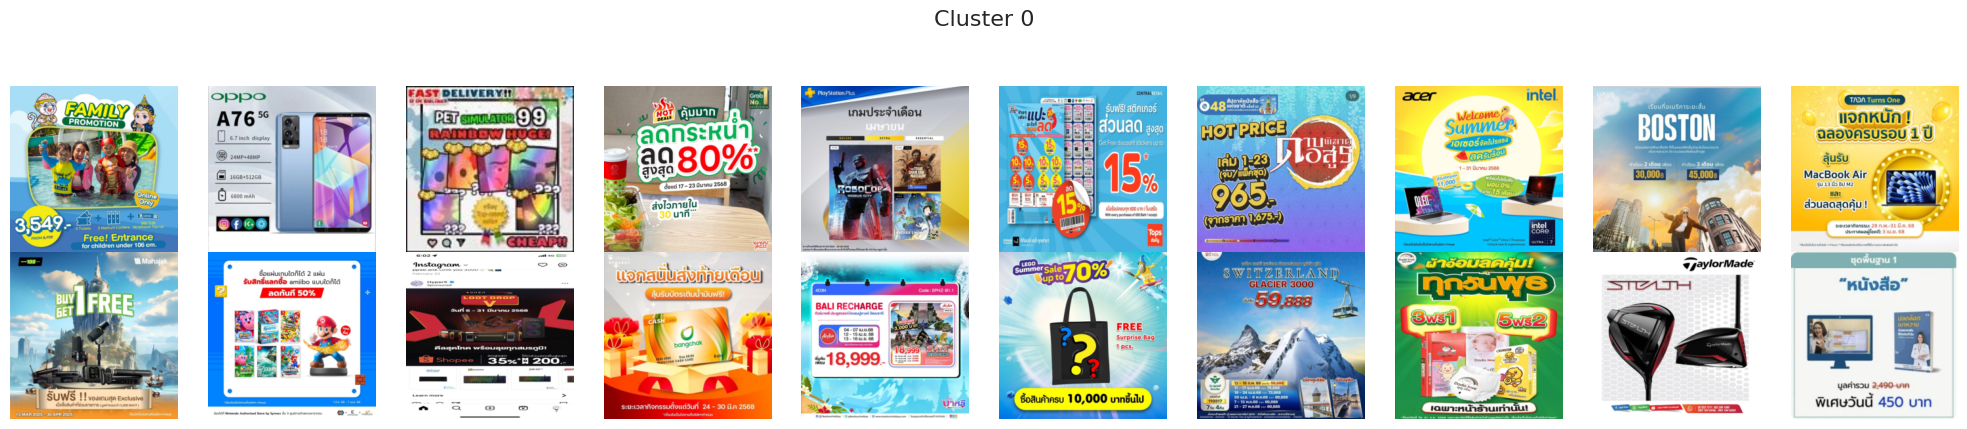

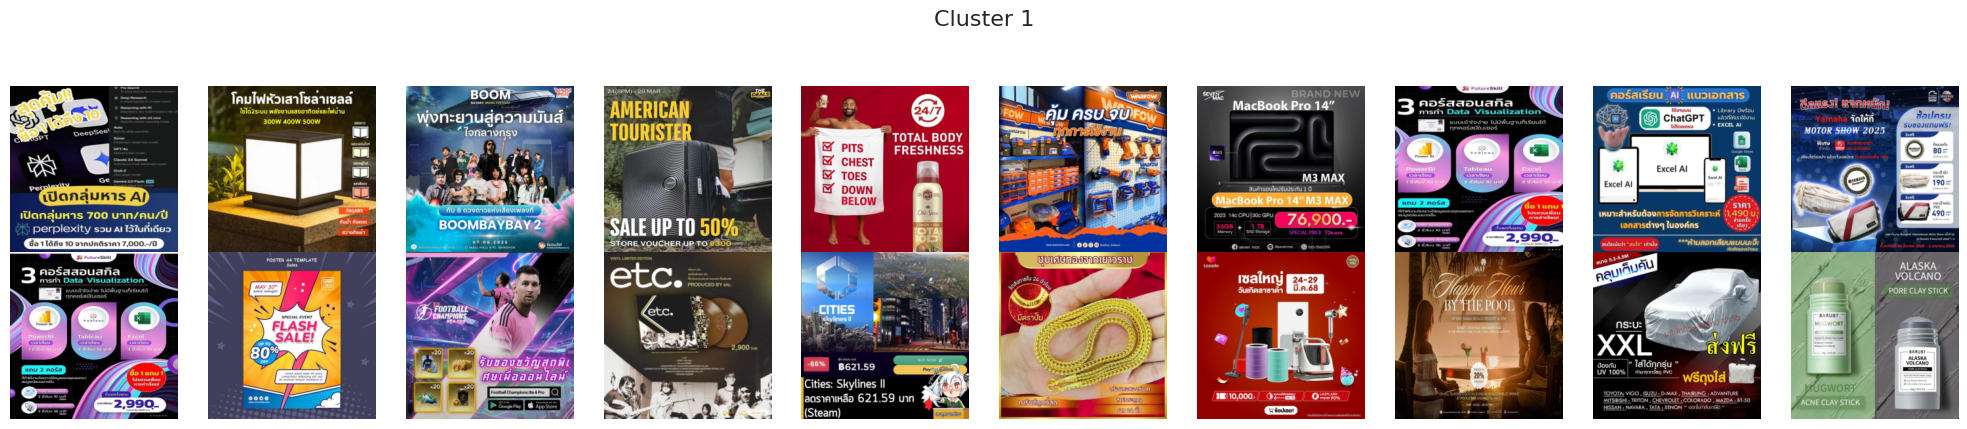

In [43]:
samples_per_cluster = 20  
images_per_row = 10       

for cluster in range(2):
    imgs = cluster_images[cluster]
    num_samples = min(samples_per_cluster, len(imgs))
    selected = np.random.choice(len(imgs), size=num_samples, replace=False)

    num_rows = int(np.ceil(num_samples / images_per_row))

    plt.figure(figsize=(images_per_row * 2, num_rows * 2.2))

    for i, idx in enumerate(selected):
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(imgs[idx])
        plt.axis('off')

    plt.suptitle(f"Cluster {cluster}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.savefig(f"cluster_{cluster}_images.png", dpi=400, bbox_inches='tight')
    plt.show()

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
reader = easyocr.Reader(['en', 'th'])

In [ ]:
for cluster_id, images in cluster_images.items():
    print(f"\n=== Cluster {cluster_id} ===")

    for i in range(min(3, len(images))):
        img = (images[i] * 255).astype('uint8')
        result = reader.readtext(img)

        print(f"\nImage {i+1} in Cluster {cluster_id}:")
        for (bbox, text, conf) in result:
            print(f"  - Text: '{text}', Confidence: {conf:.2f}")

Load data to text

In [ ]:
cluster_texts = {}

for cluster_id, images in cluster_images.items():
    print(f"\n=== Cluster {cluster_id} ===")
    
    texts = []
    
    for i in range(len(images)):  
        img = (images[i] * 255).astype('uint8') 
        result = reader.readtext(img)
        for (bbox, text, conf) in result:
            if conf >= 0.49:
                texts.append(text) 
            
    cluster_texts[cluster_id] = " ".join(texts)

In [ ]:
cluster_images.keys()

In [ ]:
cluster_texts

In [ ]:
with open('cluster_texts_lastest.json', 'w') as f:
    json.dump(cluster_texts, f)

print("Data saved successfully!")

In [ ]:
len(cluster_texts), len(cluster_texts.values())

In [ ]:
import pickle

In [ ]:
# # บันทึกข้อมูลไปยังไฟล์
# with open('cluster_texts.pkl', 'wb') as f:
#     pickle.dump(cluster_texts, f)

# print("Data saved successfully!")

In [ ]:
# # โหลดข้อมูลจากไฟล์
# with open('cluster_texts.pkl', 'rb') as f:
#     cluster_texts = pickle.load(f)

# print("Data loaded successfully!")

In [ ]:
import json

In [ ]:
# # บันทึกข้อมูลเป็น JSON
# with open('cluster_texts.json', 'w') as f:
#     json.dump(cluster_texts, f)

# print("Data saved successfully!")

In [ ]:
with open('/kaggle/input/cluster-text/cluster_texts.json', 'r') as f:
    cluster_texts = json.load(f)
print('done')

In [ ]:
!pip install pythainlp

In [ ]:
import re
import nltk
import pythainlp
from pythainlp.tokenize import word_tokenize as thai_tokenize
from nltk.tokenize import word_tokenize as eng_tokenize
from nltk.corpus import stopwords
from pythainlp.corpus.common import thai_stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
from pythainlp import word_tokenize

In [ ]:
!pip install attacut

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
stop_words_en = set(stopwords.words('english'))
stop_words_th = set(thai_stopwords())
lemmatizer = WordNetLemmatizer()

In [ ]:
preprocessed_tokens = {}

for cluster_id, text in cluster_texts.items():
    tokens_th = thai_tokenize(text, keep_whitespace=False)
    tokens_en = eng_tokenize(text)
    
    tokens = tokens_th + tokens_en  

    clean_tokens = []
    for token in tokens:
        token = token.lower()
        token = re.sub(r'[^\u0E00-\u0E7Fa-z]', '', token)  # เก็บแค่ตัวอักษรไทย/อังกฤษ

        if not token:
            continue

        # ตรวจสอบว่าเป็นภาษาอังกฤษ
        if re.match(r'[a-z]+', token):
            if token not in stop_words_en:
                lemma = lemmatizer.lemmatize(token)
                clean_tokens.append(lemma)
        else:  # ภาษาไทย
            if token not in stop_words_th:
                clean_tokens.append(token)

    preprocessed_tokens[cluster_id] = clean_tokens

for cluster_id, tokens in preprocessed_tokens.items():
    print(f"\n=== Cluster {cluster_id} ===")
    print(tokens[:20])

In [ ]:
len_dict = {key: len(values) for key, values in preprocessed_tokens.items()}
len_dict

In [ ]:
dict_cluster0 = preprocessed_tokens['0']
dict_cluster0[:20]

In [ ]:
!pip install spellchecker

English Normalize

In [ ]:
!pip install textblob
# python -m textblob.download_corpora

In [ ]:
from pythainlp import spell
from pythainlp.util import normalize
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import re
from textblob import TextBlob  # ใช้ textblob แทน spellchecker

In [ ]:

# ฟังก์ชันตรวจสอบภาษา
def is_english(word):
    return bool(re.match('^[a-zA-Z]+$', word))

# ฟังก์ชัน normalize คำภาษาอังกฤษ
def normalize_english(word):
    word = word.lower()
    # ใช้ TextBlob สำหรับตรวจสอบการสะกดภาษาอังกฤษ
    corrected = str(TextBlob(word).correct())
    return corrected if corrected != word else word

# ฟังก์ชัน normalize คำภาษาไทย
def normalize_thai(word):
    word = normalize(word)  # ปรับเป็นรูปแบบปกติ
    corrected = spell(word)
    return corrected if corrected else word

# ฟังก์ชัน normalize คำ
def normalize_word(word):
    word = word.strip()
    word = re.sub(r'[^\w\s]', '', word)
    
    if not word:
        return None
    
    if is_english(word):
        return normalize_english(word)
    else:
        return normalize_thai(word)

# ฟังก์ชัน normalize ทั้ง cluster
def normalize_cluster(tokens):
    normalized_tokens = []
    for token in tokens:
        normalized = normalize_word(token)
        if normalized and len(normalized) > 1:
            normalized_tokens.append(normalized)
    return normalized_tokens

# Normalize ทั้ง dictionary
# normalized_preprocessed_tokens = {}
# for cluster_id, tokens in preprocessed_tokens.items():
#     normalized_preprocessed_tokens[cluster_id] = normalize_cluster(tokens)

normalized_preprocessed_tokens = normalize_cluster(dict_cluster0)

In [ ]:
dict_cluster0[:50]

In [ ]:
normalized_preprocessed_tokens[:50]

Thai Normalize

In [ ]:
def normalize_thai_word(word):
    word = re.sub(r'(.)\1+', r'\1', word)  # เช่น 'กกก' → 'ก'
    
    word = re.sub(r'^[ว]+$', '', word)  # เช่น 'ว' → ''
    
    return word

print(normalize_thai_word("มากกก"))  # Output: "มาก"
print(normalize_thai_word("ว"))      # Output: ""